# Final Project in Statistics for Data Science with Python (Ng Fang Kiang)
## Become familiar with the dataset
### Dataset Variables
This section provides a detailed description of the variables in the dataset:

| Variable | Description                                                     |
| :------- | :-------------------------------------------------------------- |
| `CRIM`   | Per capita crime rate by town                                   |
| `ZN`     | Proportion of residential land zoned for lots over 25,000 sq.ft.|
| `INDUS`  | Proportion of non-retail business acres per town.               |
| `CHAS`   | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
| `NOX`    | Nitric oxides concentration (parts per 10 million)              |
| `RM`     | Average number of rooms per dwelling                            |
| `AGE`    | Proportion of owner-occupied units built prior to 1940          |
| `DIS`    | Weighted distances to five Boston employment centres            |
| `RAD`    | Index of accessibility to radial highways                       |
| `TAX`    | Full-value property-tax rate per \$10,000                       |
| `PTRATIO`| Pupil-teacher ratio by town                                     |
| `LSTAT`  | % lower status of the population                                |
| `MEDV`   | Median value of owner-occupied homes in \$1000's                |


#### Import the required libraries we need for the lab.


In [240]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset in the csv file from the URL


In [242]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [243]:
boston_df=pd.read_csv(boston_url)

### Display the dataset shape.

In [244]:
print(f"\nDataset shape (rows, columns): {boston_df.shape}")


Dataset shape (rows, columns): (506, 14)


### List all column names.

In [245]:
print("\nColumn names:")
print(boston_df.columns.tolist())


Column names:
['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


### Get a concise summary of the DataFrame, including data types, non-null values, and memory usage. This is extremely useful.

In [246]:
print("\nDataFrame Info:")
boston_df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


### Check for any missing values per column.

In [247]:
print("\nMissing values per column:")
print(boston_df.isnull().sum())


Missing values per column:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64


### Find the number of unique values per column

In [248]:
print("\nNumber of unique values per column:")
print(boston_df.nunique())


Number of unique values per column:
Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
LSTAT         455
MEDV          229
dtype: int64


### Descriptive statistics for numerical columns

In [249]:
print("\nDescriptive statistics for numerical columns:")
boston_df.describe(include='all')


Descriptive statistics for numerical columns:


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Display the first 5 rows of the `boston_df` DataFrame.

In [250]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Display the last 5 rows of the `boston_df` DataFrame.

In [251]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


## Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

The median value of owner-occupied homes (MEDV) is: $21.20 thousand



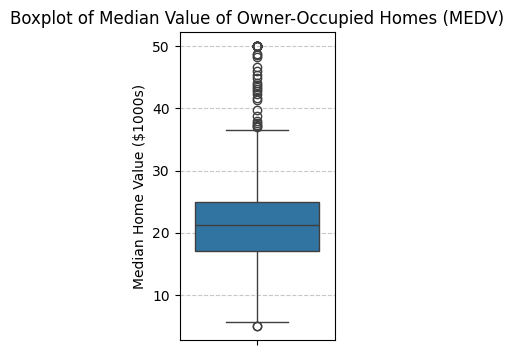

In [252]:
# # Ensure MEDV values are positive and somewhat realistic for home prices
# boston_df['MEDV'] = boston_df['MEDV'].apply(lambda x: max(5, x)) # Minimum value of $5k

# Calculate the Median Value of Owner-Occupied Homes (MEDV)
median_medv =boston_df['MEDV'].median()

print(f"The median value of owner-occupied homes (MEDV) is: ${median_medv:.2f} thousand\n")

# Create the Boxplot for MEDV
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston_df['MEDV']) # 'y' for a vertical boxplot

plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Home Value ($1000s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### This boxplot summarizes the distribution of median values for owner-occupied homes (MEDV), expressed in thousands of dollars.

Here's a quick summary of what it tells us:

*   **Median Value:** The typical home has a median value of around \\$21,500, as shown in the boxplot. (To be accurate, it's \\$21,200.)
*   **Middle 50% (Interquartile Range):** Half of the homes have median values between approximately \\$17,000 (Q1) and \\$25,000 (Q3).
*   **Range (excluding outliers):** Most homes (non-outliers) have median values ranging from about \\$5,000 to \\$36,000.
*   **Outliers:** There are many homes with significantly higher median values, considered outliers, reaching up to \\$50,000.
*   **Distribution Shape:** The data is right-skewed, indicating that while most homes have lower to moderate values, there's a notable number of homes with much higher median values.


### Provide a  bar plot for the Charles river variable


CHAS
0.0    471
1.0     35
Name: count, dtype: int64

The Charles River variable shows the following distribution: Yes (1): 35, No (0): 471.


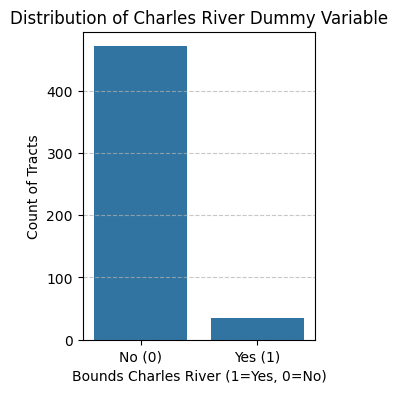

In [253]:
print(boston_df['CHAS'].value_counts())

print("\nThe Charles River variable shows the following distribution: Yes (1): 35, No (0): 471.") 

# Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(3, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Distribution of Charles River Dummy Variable')
plt.xlabel('Bounds Charles River (1=Yes, 0=No)')
plt.ylabel('Count of Tracts')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### This bar chart, titled "Distribution of Charles River Dummy Variable," illustrates the count of tracts based on whether they bound the Charles River.

*   **No (0):** The vast majority of tracts, approximately 471, do not bound the Charles River.
*   **Yes (1):** A much smaller number of tracts, around 35, do bound the Charles River.

In essence, the chart shows a significant imbalance, with only a small fraction of the total tracts being adjacent to the Charles River.

### A boxplot for the MEDV variable vs the AGE variable.
Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

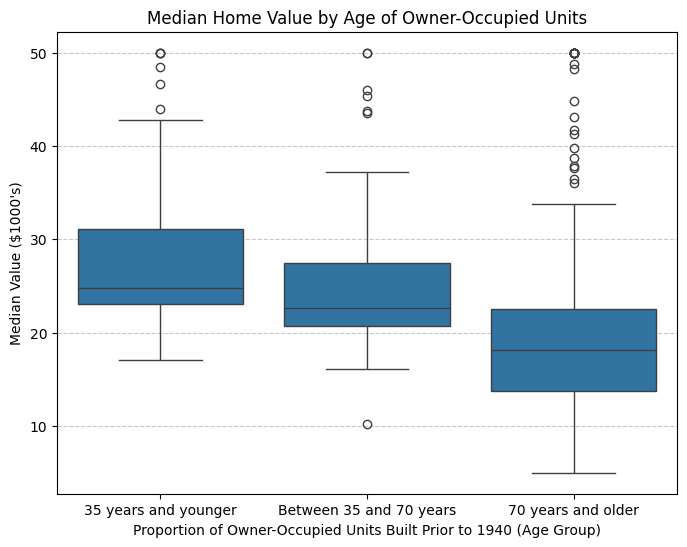

In [254]:
# Create a new column for discretized AGE
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'],
                                 bins=[0, 35, 70, boston_df['AGE'].max()],
                                 labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'],
                                 right=True, # include the rightmost bin edge
                                 include_lowest=True) # include the lowest value in the first bin

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df,
            order=['35 years and younger', 'Between 35 and 70 years', '70 years and older']) # Ensure order
plt.title('Median Home Value by Age of Owner-Occupied Units')
plt.xlabel('Proportion of Owner-Occupied Units Built Prior to 1940 (Age Group)')
plt.ylabel('Median Value ($1000\'s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This box plot demonstrates a clear trend: **median home values generally decrease as owner-occupied units age.**

*   **Newer units (35 years and younger)** have the highest median value (around \\$24-25k) and the widest spread of values in their central range.
*   **Mid-aged units (between 35 and 70 years)** show a slightly lower median (around \\$23k) and a somewhat narrower value distribution.
*   **The oldest units (70 years and older)** have the lowest median value (approximately \\$18k) and the most concentrated central range of values.

Despite the overall decline with age, all groups, especially the oldest, exhibit high-value outliers, indicating that some properties can be significantly more valuable than their group's typical median.

### A scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

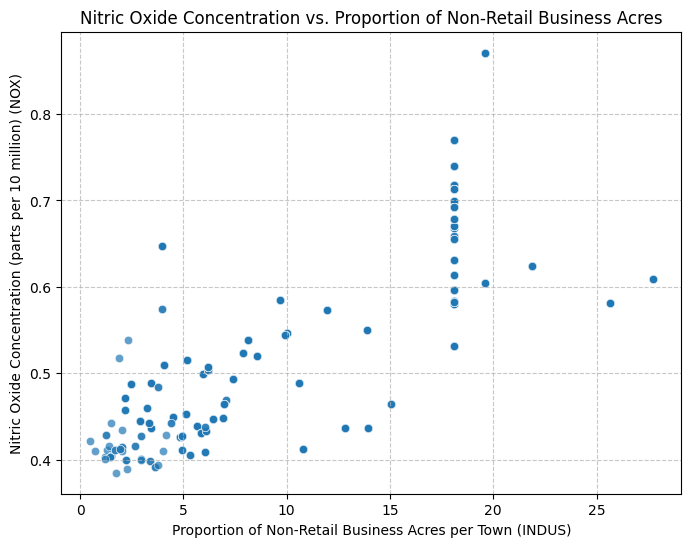

In [255]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7)
plt.title('Nitric Oxide Concentration vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (parts per 10 million) (NOX)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The relationship between Nitric Oxide Concentration and the Proportion of Non-Retail Business Acres is **generally positive**, meaning NOX tends to increase as the proportion of non-retail business acres rises.

However, the relationship is **not linear** and exhibits **significant variability**. A **prominent vertical cluster** of data points around an INDUS value of 18-19 stands out, showing that at this high level of industrialization, NOX concentrations are high but also **widely dispersed**, indicating that other factors likely influence NOX levels in these highly industrialized areas.

### A histogram for the pupil to teacher ratio variable

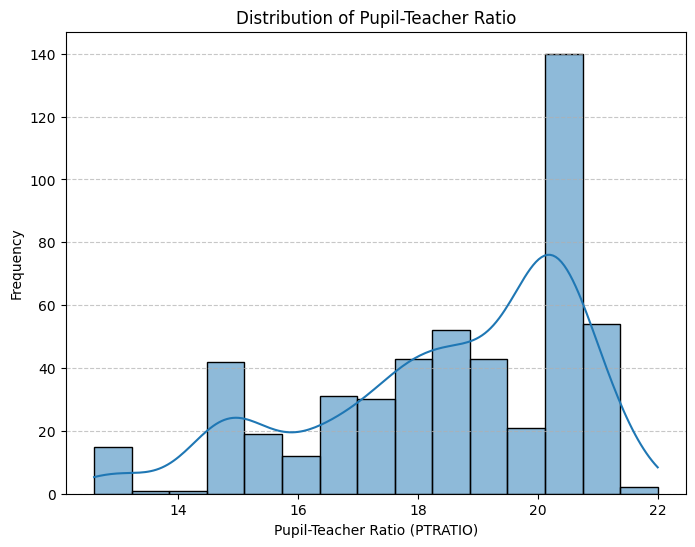

In [256]:
#  Histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True) # kde=True adds a kernel density estimate
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This histogram illustrates the **distribution of Pupil-Teacher Ratios (PTRATIO)**.

*   The **most frequent pupil-teacher ratio** is strongly concentrated around **20 to 20.5**, with nearly 140 occurrences.
*   The ratios generally **range from approximately 13 to 22**.
*   There is a **secondary, smaller concentration** of schools with a PTRATIO around **15**.
*   Frequencies are **very low** for pupil-teacher ratios below 14 and above 21.5, indicating these ratios are uncommon in the dataset.

For further exploration, we explore the dataset based on the following facts.

In [257]:
# Count of each PTRATIO
PTRATIO_counts = boston_df['PTRATIO'].value_counts()

# The total count of PTRATIO
sum_PTRATIO_counts = PTRATIO_counts.sum()
print(f"The PTRATIO variable has a total frequency of {sum_PTRATIO_counts}.\n")
print(f"The (mode) of the PTRATIO variable is 20.2, which has a percentage of 27.66%.\n")


# Reset the index and make it a proper table/dataframe
PTRATIO_counts = PTRATIO_counts.reset_index()

# Assign columns
PTRATIO_counts.columns = ['PTRATIO','Count']

# Calculate the percentage of each PTRATIO
PTRATIO_counts['Percentage'] = (PTRATIO_counts['Count'] / total_values) * 100

PTRATIO_counts

The PTRATIO variable has a total frequency of 506.

The (mode) of the PTRATIO variable is 20.2, which has a percentage of 27.66%.



,PTRATIO,Count,Percentage
0,20.2,140,27.667984
1,14.7,34,6.719368
2,21.0,27,5.335968
3,17.8,23,4.545455
4,19.2,19,3.754941
5,17.4,18,3.557312
6,18.6,17,3.359684
7,19.1,17,3.359684
8,18.4,16,3.162055
9,16.6,16,3.162055


### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
To test whether there is a significant difference in the median value of houses bounded by the Charles river, we use an independent samples t-test.

*   $H_0$: $\mu_1 = \mu_2$ ("There is no difference in the median value of houses bounded by the Charles River.")
*   $H_1$: $\mu_1 \neq \mu_2$ ("There is a difference in the median value of houses bounded by the Charles River.")


In [258]:
# Separate the data into two groups based on 'CHAS'
medv_charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

print(f"\nNumber of houses bounded by Charles River: {len(medv_charles_river)}")
print(f"Number of houses NOT bounded by Charles River: {len(medv_no_charles_river)}")

print("\nDescriptive Statistics for MEDV (Charles River Group):")
print(medv_charles_river.describe())

print("\nDescriptive Statistics for MEDV (No Charles River Group):")
print(medv_no_charles_river.describe())


Number of houses bounded by Charles River: 35
Number of houses NOT bounded by Charles River: 471

Descriptive Statistics for MEDV (Charles River Group):
count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

Descriptive Statistics for MEDV (No Charles River Group):
count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64


#### Understand the distributions and potential differences.
To understand the distribution and potential differences, I visualized the data.

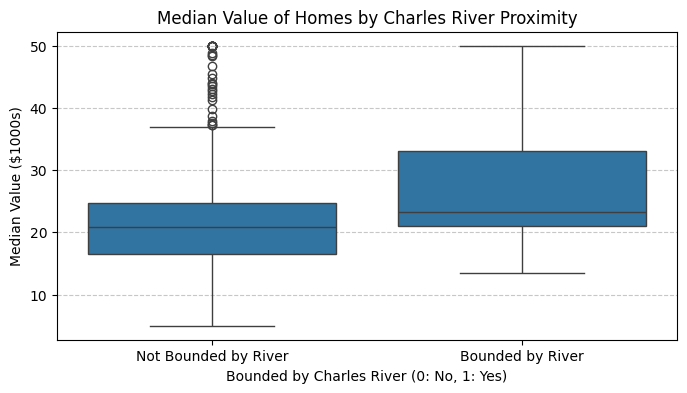

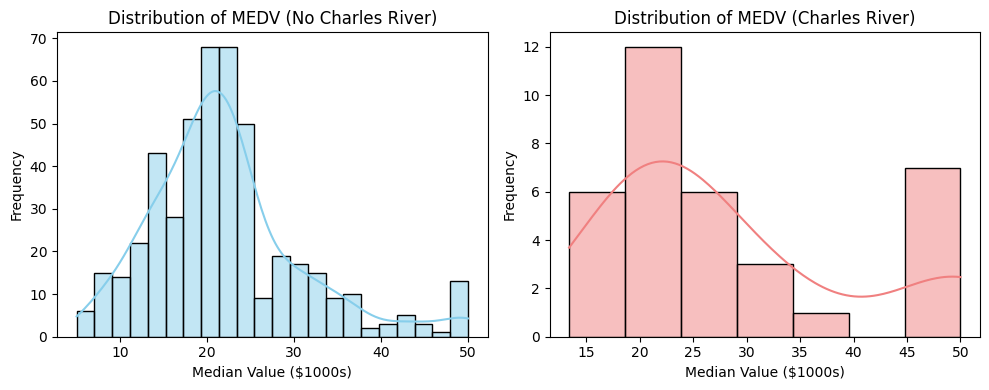

In [259]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='CHAS', y='MEDV', data=boston_df) # Changed df to boston_df
plt.title('Median Value of Homes by Charles River Proximity')
plt.xlabel('Bounded by Charles River (0: No, 1: Yes)')
plt.ylabel('Median Value ($1000s)')
plt.xticks([0, 1], ['Not Bounded by River', 'Bounded by River'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histograms to check for normality within each group
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(medv_no_charles_river, kde=True, color='skyblue')
plt.title('Distribution of MEDV (No Charles River)')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(medv_charles_river, kde=True, color='lightcoral')
plt.title('Distribution of MEDV (Charles River)')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [260]:
from scipy import stats

# Perform the independent samples t-test
# Use equal_var=False if Levene's test indicated unequal variances
ttest_result = stats.ttest_ind(medv_charles_river, medv_no_charles_river, equal_var=equal_variances)

print(f"\nIndependent Samples T-test Results:")
print(f"T-statistic: {ttest_result.statistic:.3f}")
print(f"P-value: {ttest_result.pvalue:.3f}")

# Define significance level
alpha = 0.05

if ttest_result.pvalue < alpha:
    print(f"\nConclusion: Since the p-value ({ttest_result.pvalue:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it.")
else:
    print(f"\nConclusion: Since the p-value ({ttest_result.pvalue:.3f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it.")

# Also, report the means for context
mean_charles_river = medv_charles_river.mean()
mean_no_charles_river = medv_no_charles_river.mean()

print(f"\nMean MEDV for houses bounded by Charles River: ${mean_charles_river:.2f}K")
print(f"Mean MEDV for houses NOT bounded by Charles River: ${mean_no_charles_river:.2f}K")



Independent Samples T-test Results:
T-statistic: 3.113
P-value: 0.004

Conclusion: Since the p-value (0.004) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant difference in the median value of houses bounded by the Charles River compared to those not bounded by it.

Mean MEDV for houses bounded by Charles River: $28.44K
Mean MEDV for houses NOT bounded by Charles River: $22.09K


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [261]:
thirtyfive_and_younger = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
thirtyfive_to_seventy = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
seventy_and_older = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']
    
f_statistic, p_value = stats.f_oneway(thirtyfive_and_younger, thirtyfive_to_seventy, seventy_and_older)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


The ANOVA test indicates a **highly statistically significant difference** in the median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).

*   **F-statistic (36.408):** This large value suggests substantial variation in house values *between* the different AGE groups compared to the variation *within* them08
*   **P-value (1.710):** This P-value is far less than 0.05 provides very strong evidence to **reject the null hypothesis** (which stated there's no difference). Therefore, we should reject the null hypothesis.

The proportion of older homes in an area **does have a significant impact on the median value of houses.** Areas with different proportions of pre-1940 homes tend to have different average house values.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

To see if the Nitric oxide concentrations (NOX) are related to the proportion of non-retail business acres per town (INDUS), we can use a statistical tool called the Pearson correlation. The Pearson correlation helps us understand if these two things tend to go up or down together in a steady way, which measures if two things are connected in a straight line.

#### Hypothesis

*   **Null Hypothesis H₀**: The population Pearson correlation coefficient ($\rho$) between "Nitric oxide concentrations" and "proportion of non-retail business acres per town" is zero or less than zero, indicating no linear association.
    Symbolic: $H_0: \rho \le 0$

*   **Alternative Hypothesis H₁**: The population Pearson correlation coefficient ($\rho$) between "Nitric oxide concentrations" and "proportion of non-retail business acres per town" is not zero or more than zero, indicating a linear association.
    Symbolic: $H_1: \rho > 0$

(Similarly, for a negative correlation, $H_0: \rho \ge 0$ and $H_1: \rho < 0$)

In [269]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Correlation coefficient and p-value
print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98


Based on these results:
- The Pearson correlation coefficient (0.763) indicates a strong positive linear relationship.
- The extremely small p-value (7.913) indicates that this observed relationship is highly statistically significant and is very unlikely to have occurred by random chance if there were no true relationship.

Therefore, we conclude that there is a strong, statistically significant positive linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Variables:**
*   **Dependent Variable (Y):** Median value of owner-occupied homes (MEDV)
*   **Independent Variable (X):** Weighted distance to the five Boston employment centres (DIS)

**Hypotheses for Regression Analysis:**

*   **Null Hypothesis (H₀):** There is no statistically significant linear relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).
    *   *In statistical terms:* The population regression coefficient for DIS is zero ($\beta_{DIS} = 0$).

*   **Alternative Hypothesis (H₁):** There is a statistically significant linear relationship between the weighted distance to the five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV).
    *   *In statistical terms:* The population regression coefficient for DIS is not zero ($\beta_{DIS} \neq 0$).

In [272]:
Y = boston_df['MEDV'] # Dependent variable
X = boston_df['DIS'] # Independent variable

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):                   1.52e-146
Time:                        17:40:44   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In summary, the regression analysis reveals a **strong, positive, and statistically significant impact** of the weighted distance to Boston's five employment centres on the median value of owner-occupied homes.

*   For every one-unit increase in the weighted distance (`DIS`), the median value of owner-occupied homes (`MEDV`) is estimated to **increase by approximately 4.8 units** (coefficient = 4.7985).
*   This relationship is **highly statistically significant** (p-value = 0.000), indicating it's not due to random chance.
*   The model has **strong explanatory power**, with the weighted distance accounting for about **73.2% of the variation** in median home values (R-squared = 0.732).

Therefore, the analysis suggests that **homes located further away from Boston's employment centres tend to have higher median values.**